In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
from datetime import datetime
import warnings

plt.style.use('ggplot')

In [72]:
df = pd.read_csv('bikeStats.csv')
df = df.drop(['Type', '/km'], axis=1)
df['CumSum'] = df['km'].cumsum()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2023-07-24 to 2023-09-20
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ISO       7 non-null      object 
 1   Duration  7 non-null      float64
 2   bpm-Avg.  7 non-null      float64
 3   bpm-%     7 non-null      float64
 4   bpm-hi    7 non-null      float64
 5   Cals      7 non-null      float64
 6   Cals/h    7 non-null      float64
 7   km        7 non-null      float64
 8   km/h      7 non-null      float64
 9   CumSum    7 non-null      float64
dtypes: float64(9), object(1)
memory usage: 616.0+ bytes


In [73]:
def med(df, col, deci=None):
    median = round(df[col].median(),deci)
    return median

def avg(df, col, deci=None):
    average = round(df[col].mean(), deci)
    return average

def max(df, col, deci=None):
    maximum = round(df[col].max(),deci)
    return maximum

def sum(df, col, deci=None):
    total = round(df[col].sum(),deci)
    return total

def midp(df, col):
    midpoint = (df[col].max() + df[col].min()) / 2
    return midpoint

def rolla(df, col, windw):
    rolling_average = df[col].rolling(window=windw).mean()
    return rolling_average

def rnd(val, deci):
    new = round(val, deci)
    return new

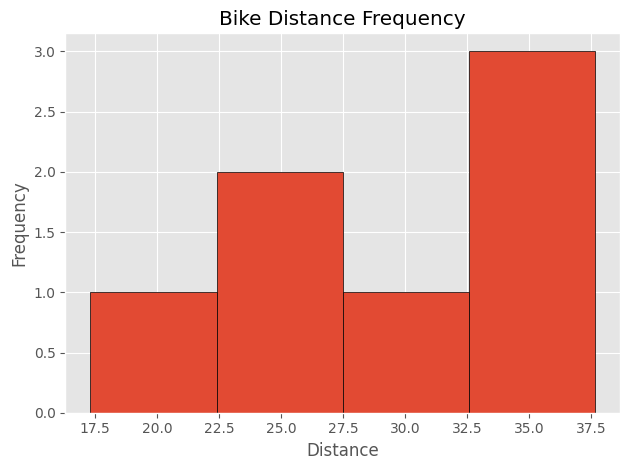

In [74]:
plt.hist(df['km'], bins='auto', edgecolor='black')
plt.title('Bike Distance Frequency')
plt.xlabel('Distance')
plt.ylabel('Frequency')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Graphs/BDistance Frequency.png', dpi=600)
plt.show()

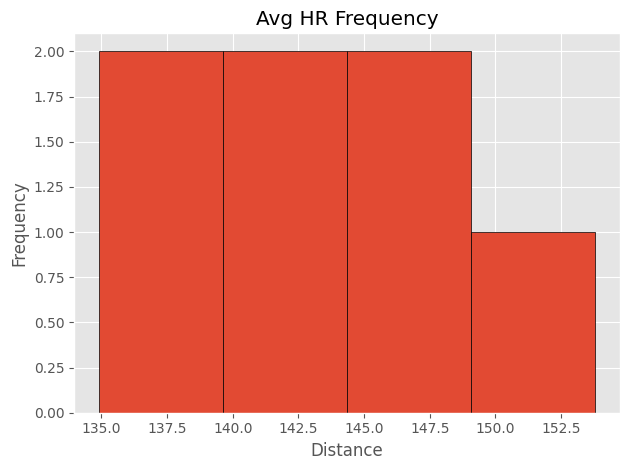

In [75]:
plt.hist(df['bpm-Avg.'], bins='auto', edgecolor='black')
plt.title('Avg HR Frequency')
plt.xlabel('Distance')
plt.ylabel('Frequency')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Graphs/BHR Frequency.png', dpi=600)
plt.show()

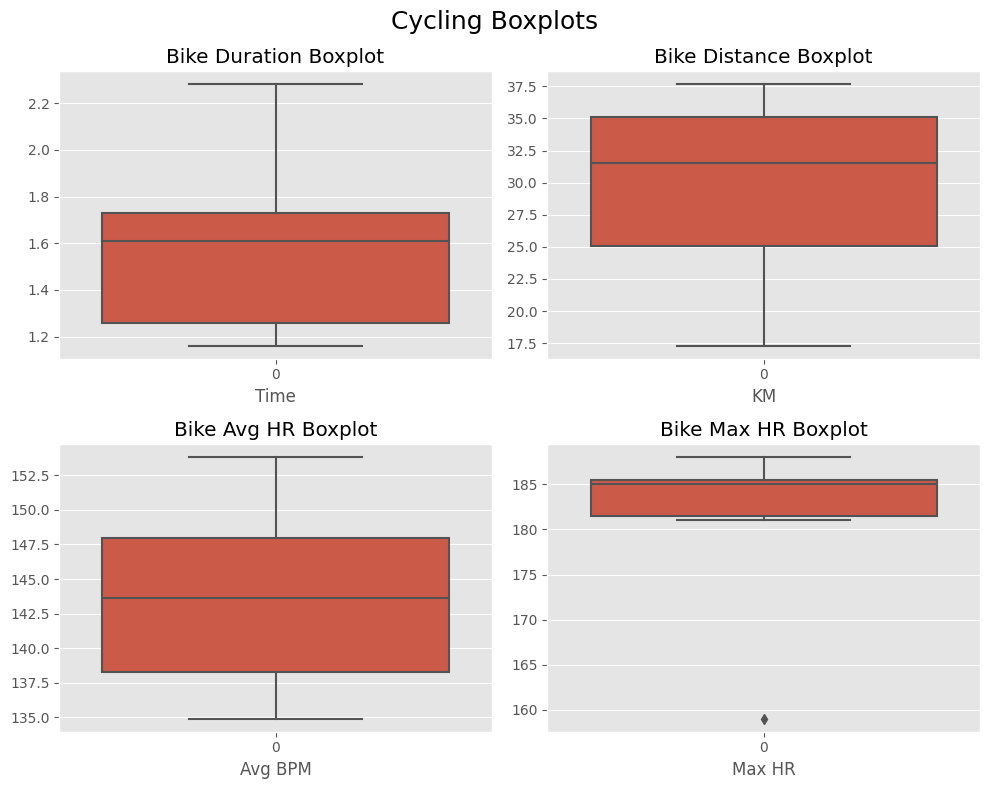

In [76]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Run Duration Boxplot
sns.boxplot(df['Duration'], ax=axes[0, 0])
axes[0, 0].set_title('Bike Duration Boxplot')
axes[0, 0].set_xlabel('Time')
# Run Distance Boxplot
sns.boxplot(df['km'], ax=axes[0, 1])
axes[0, 1].set_title('Bike Distance Boxplot')
axes[0, 1].set_xlabel('KM')
# Run Average HR Boxplot
sns.boxplot(df['bpm-Avg.'], ax=axes[1, 0])
axes[1, 0].set_title('Bike Avg HR Boxplot')
axes[1, 0].set_xlabel('Avg BPM')
# Run Max HR Boxplot
sns.boxplot(df['bpm-hi'], ax=axes[1, 1])
axes[1, 1].set_title('Bike Max HR Boxplot')
axes[1, 1].set_xlabel('Max HR')

fig.suptitle('Cycling Boxplots', fontsize=18)

plt.tight_layout()
plt.savefig('Graphs/Bike Boxplots.png', dpi=600)
plt.show()

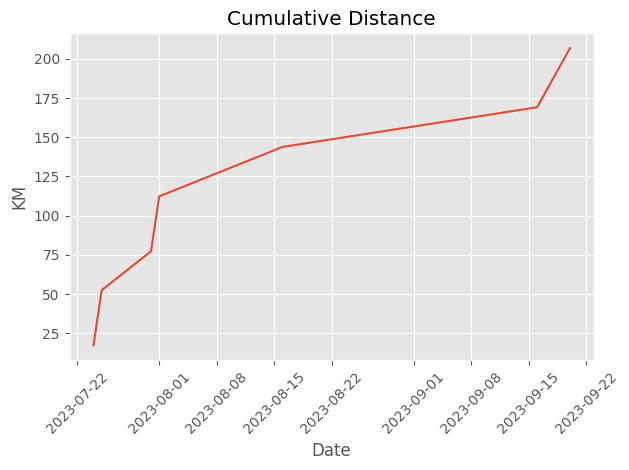

In [77]:
plt.plot(df.index, df['CumSum'])
plt.title('Cumulative Distance')
plt.xlabel('Date')
plt.ylabel('KM')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Graphs/BCumulative Distance.png', dpi=600)
plt.show()

In [78]:
wklySUM = pd.DataFrame(df.groupby(pd.Grouper(freq='W-SUN')).agg('sum', numeric_only=True))
wklyAVG = pd.DataFrame(df.groupby(pd.Grouper(freq='W-SUN')).agg('mean', numeric_only=True))

# wklySUM = wklySUM[wklySUM['km'] != 0]
# wklyAVG = wklyAVG[wklyAVG['km'] != 0]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


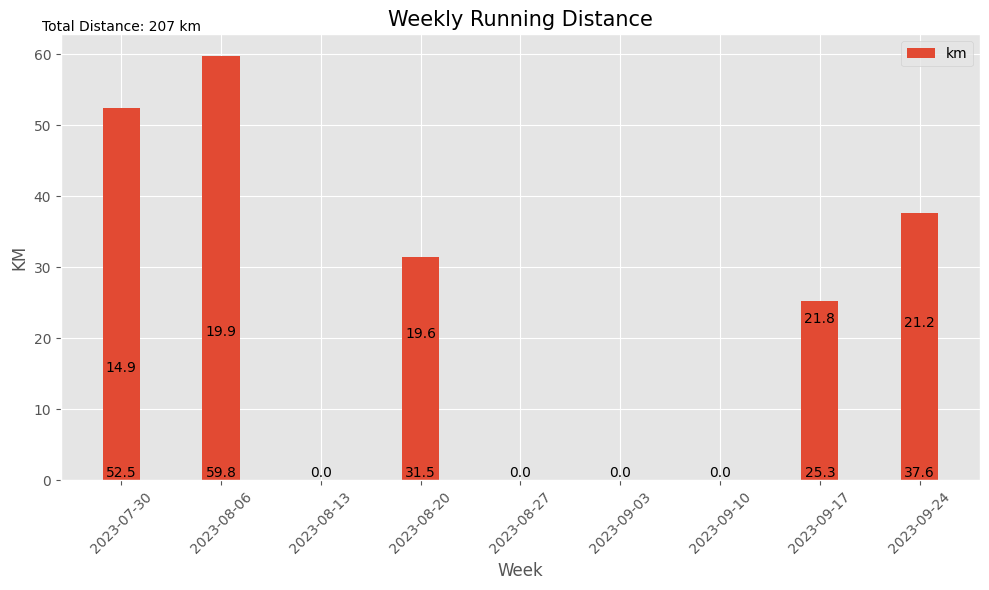

In [82]:
plt.figure(figsize=(10,6))

# Average Speed Line
for idx, value in enumerate(wklyAVG['km/h']):
        plt.text(wklyAVG.index[idx], wklyAVG['km/h'][idx], f'{value:.1f}', ha='center', va='bottom',
        fontsize=10, color='black')

# Toal Distance Text
total_distance = sum(wklySUM, 'km')
plt.text(wklySUM.index[0], wklySUM['km'].max() + 3, f'Total Distance: {total_distance:.0f} km',
        ha='center', va='bottom', fontsize=10, color='black', transform=plt.gca().transData)

plt.bar(wklySUM.index, wklySUM['km'], label='km', width=2.6)
for idx, value in enumerate(wklySUM['km']):
        plt.text(wklySUM.index[idx], 0, f'{value:.1f}', ha='center', va='bottom',
        fontsize=10, color='black')

plt.xlabel('Week')
plt.ylabel('KM')
plt.title('Weekly Running Distance', fontsize=15)
plt.legend()
plt.xticks(wklySUM.index, wklySUM.index.strftime('%Y-%m-%d'), rotation=45)
plt.tight_layout()
plt.savefig('Graphs/BWeekly Distance.png', dpi=600)
plt.show()